# **Programming in Python #1**

## **Authors:**
***Rafał Cybula, 242370***\
***Adam Kruszyński, 242440***

**Start**

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb

data = pandas.read_csv("data.csv", sep=',',
                       names=["Sex", "Length [mm]", "Diameter [mm]", "Height [mm]", "Whole weight [g]",
                              "Shucked weight [g]",
                              "Viscera weight [g]", "Shell weight [g]",
                              "Rings"])
qualitativeData = data[data.columns[0]]
quantitiveData = pandas.DataFrame(data[data.columns[1:]])

**Functions**

In [2]:
def sex_of(index):
    return qualitativeData[index]


def count_qualitative_occurrences(sex):
    counter = 0
    for i in range(len(qualitativeData)):
        if sex_of(i) == sex:
            counter += 1
    return counter


def qualitative_percentage(sex):
    return round(count_qualitative_occurrences(sex) / len(qualitativeData) * 100, 2)


def generate_qualitative_dataframe():
    final_data = [[count_qualitative_occurrences('M'), qualitative_percentage('M')],
                  [count_qualitative_occurrences('F'), qualitative_percentage('F')],
                  [count_qualitative_occurrences('I'), qualitative_percentage('I')]]
    return pandas.DataFrame(final_data, index=['Male', 'Infant', 'Female'], columns=['count', '%'])


def isolate_property(column):
    return quantitiveData[quantitiveData.columns[column]]


def generate_quantitive_dataframe():
    final_data = []
    for i in range(quantitiveData.shape[1]):
        property = isolate_property(i)
        final_data.append(
            [np.mean(property), np.std(property), np.min(property), np.quantile(property, [0.25]),
             np.median(property),
             np.quantile(property, [0.75]), np.max(property)])
    return pandas.DataFrame(final_data,
                            index=[quantitiveData.columns],
                            columns=['mean', 'std', 'min', '25%', '50%', '75%', 'max'])


def generate_qualitative_bar_chart(bar_width):
    x = ["Male", "Female", "Infant"]
    y = [count_qualitative_occurrences("M"), count_qualitative_occurrences('F'),
         count_qualitative_occurrences('I')]
    plot.bar(x[0], y[0], color="blue", width=bar_width)
    plot.bar(x[1], y[1], color="red", width=bar_width)
    plot.bar(x[2], y[2], color="green", width=bar_width)
    plot.xlabel("Sex")
    plot.ylabel("Quantity")
    plot.title("Qualitative variable occurrences")
    plot.text(x[0], y[0], str(y[0]), ha='center')  # ha - horizontal alignment
    plot.text(x[1], y[1], str(y[1]), ha='center')
    plot.text(x[2], y[2], str(y[2]), ha='center')
    plot.show()


def generate_quantitive_histogram(number_of_bins):
    figure, plot_number = plot.subplots(4, 2, layout='constrained')

    for row in range(0, 4):
        for col in range(0, 2):
            plot_number[row, col].hist(isolate_property(2 * row + col), bins=number_of_bins)
            title = quantitiveData.columns[2 * row + col]
            plot_number[row, col].set_title(title)

    for histogram in plot_number.flat:
        histogram.set(xlabel='Value', ylabel='Quantity')

    plot.show()


def generate_correlation_matrix():
    return quantitiveData.corr(method='pearson')


def generate_quantitive_scatter_plot():
    figure, plot_number = plot.subplots(14, 2, figsize=(70, 70), layout='constrained')

    row = 0
    col = 0
    for first_property in range(quantitiveData.shape[1]):
        for second_property in range(first_property + 1, quantitiveData.shape[1]):
            plot_number[row, col].scatter(isolate_property(first_property),
                                          isolate_property(second_property))
            title = quantitiveData.columns[first_property] + ' ' + quantitiveData.columns[second_property]
            plot_number[row, col].set_title(title)
            col = 1 - col
            if col == 0:
                row += 1

    plot.show()


def generate_heatmap():
    correlation_matrix = generate_correlation_matrix()
    sb.heatmap(correlation_matrix)
    plot.show()


def generate_linear_regression_plot():
    sb.regplot(quantitiveData, x="Length [mm]", y="Diameter [mm]", line_kws={"color": "red"})
    plot.show()


**Requirements for the maximum grade of 4**

***1.Using the Pandas package, create a table of the distribution of the qualitative variable in the dataset***

In [3]:
generate_qualitative_dataframe()


,count,%
Male,1528,36.58
Infant,1307,31.29
Female,1342,32.13


***2.Using the Pandas package, create a table with summary statistics for the quantitative variables in the dataset***

In [4]:
generate_quantitive_dataframe()


,mean,std,min,25%,50%,75%,max
Length [mm],0.523992,0.120079,0.0750,[0.45],0.5450,[0.615],0.8150
Diameter [mm],0.407881,0.099228,0.0550,[0.35],0.4250,[0.48],0.6500
Height [mm],0.139516,0.041822,0.0000,[0.115],0.1400,[0.165],1.1300
Whole weight [g],0.828742,0.490330,0.0020,[0.4415],0.7995,[1.153],2.8255
Shucked weight [g],0.359367,0.221936,0.0010,[0.186],0.3360,[0.502],1.4880
Viscera weight [g],0.180594,0.109601,0.0005,[0.0935],0.1710,[0.253],0.7600
Shell weight [g],0.238831,0.139186,0.0015,[0.13],0.2340,[0.329],1.0050
Rings,9.933684,3.223783,1.0000,[8.0],9.0000,[11.0],29.0000


***3.Using a package chosen among Matplotlib, Pandas, or Seaborn, create a bar chart of the counts of occurrences of each category for the qualitative variable in the dataset.***

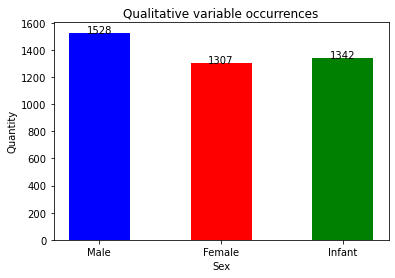

In [5]:
generate_qualitative_bar_chart(0.5)

***4.Using a package chosen among Matplotlib, Pandas, or Seaborn, create a histogram of each quantitative variable in the dataset. All histograms should be placed in a single figure spanning 4 rows and 2 columns.***

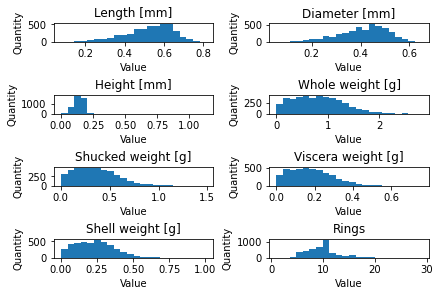

In [6]:
generate_quantitive_histogram(22)

***5.Using a package chosen among Matplotlib, Pandas, or Seaborn, create a scatter plot for each pair of the quantitative variables in the dataset. All scatter plots should be placed in a single figure spanning 14 rows and 2 columns.***

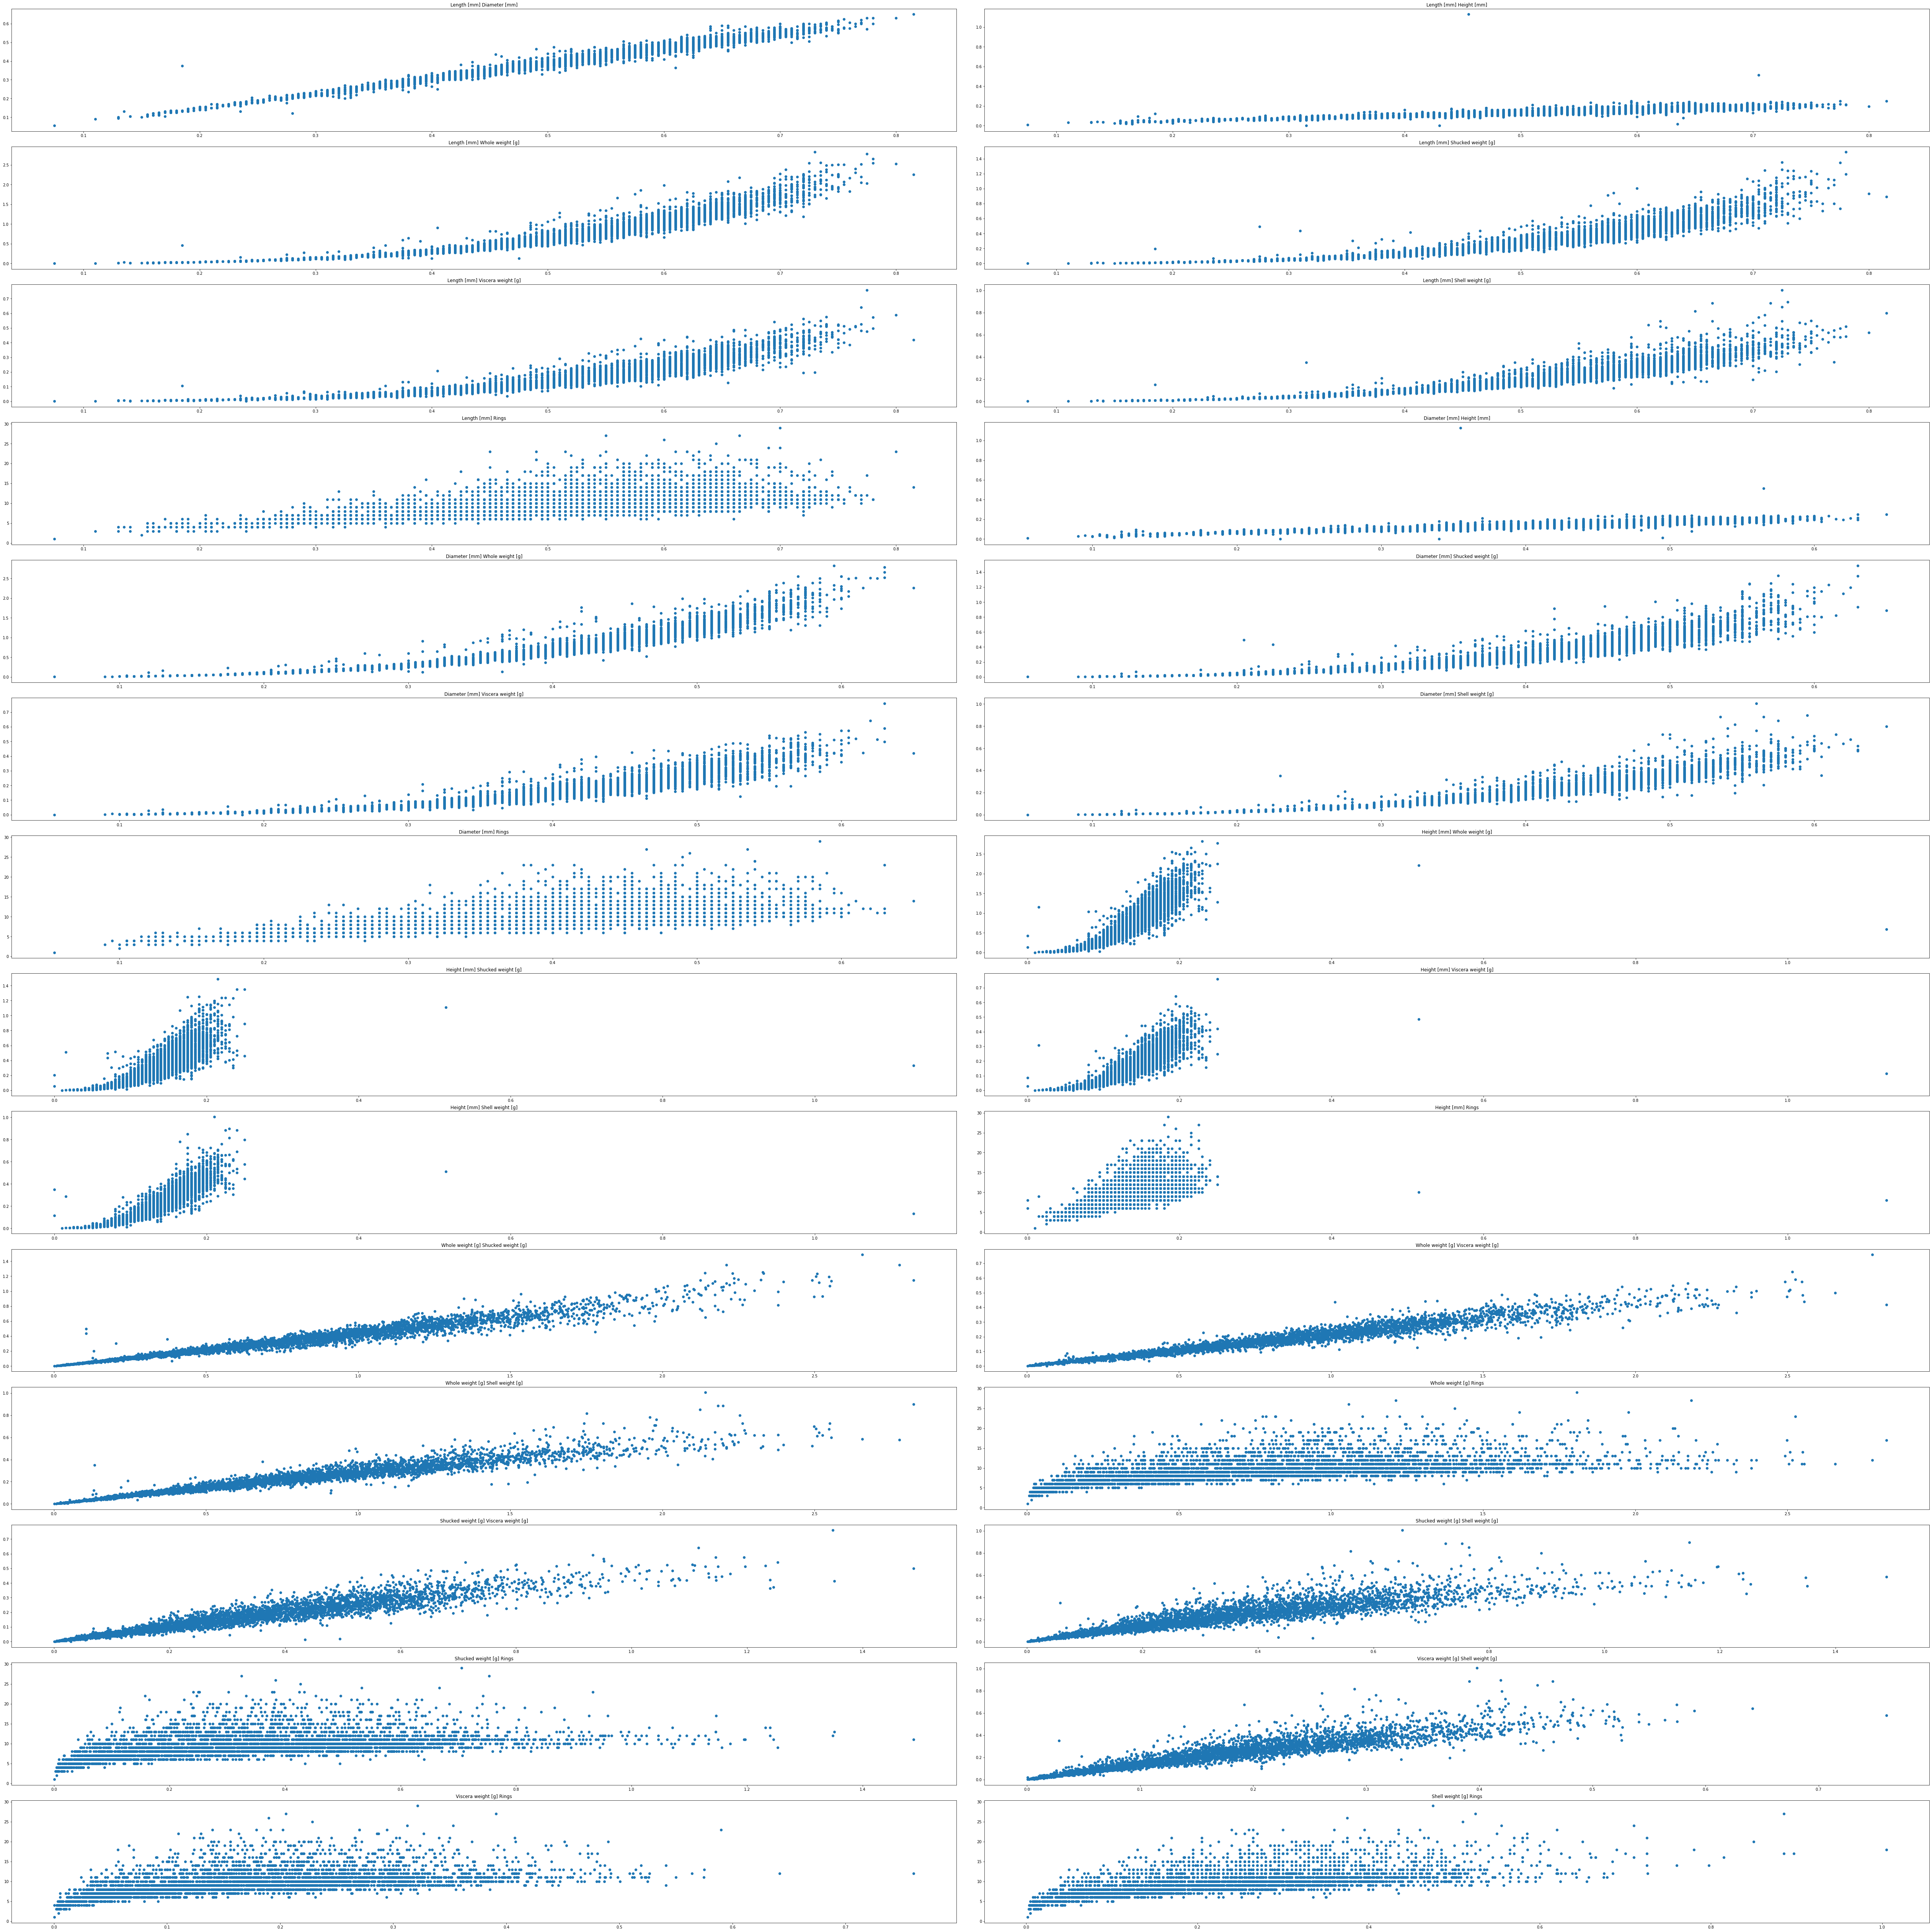

In [7]:
generate_quantitive_scatter_plot()

***6.Using the Pandas package, create a table representing a linear correlation matrix of all quantitative variables in the dataset.***

In [8]:
generate_correlation_matrix()

,Length [mm],Diameter [mm],Height [mm],Whole weight [g],Shucked weight [g],Viscera weight [g],Shell weight [g],Rings
Length [mm],1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter [mm],0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height [mm],0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight [g],0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight [g],0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight [g],0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight [g],0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


***7.Using the Seaborn package, create a heatmap representing a linear correlation matrix of all quantitative variables in the dataset.***

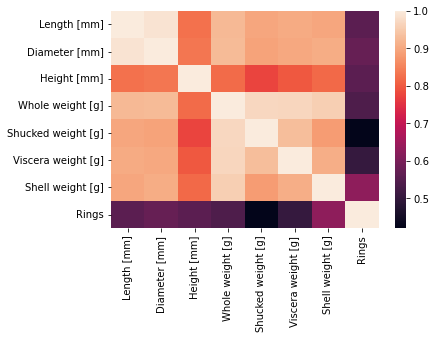

In [9]:
generate_heatmap()


***8.Using the Seaborn package, create a linear regression plot with the two quantitative variables that are most strongly linearly correlated (the variables may be hardcoded).***

In [10]:
generate_linear_regression_plot()

C:\Users\cybul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Must pass `data` if using named variables.